# MODULE 3

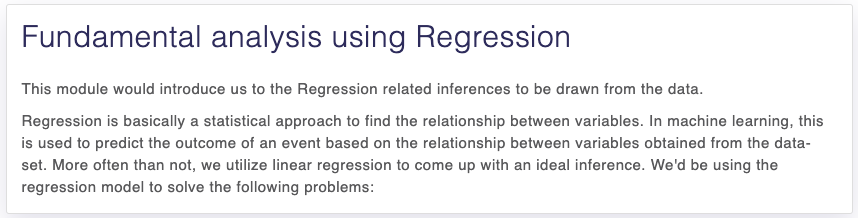

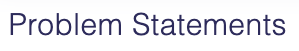

In [1520]:
#importing the libraries
import pandas as pd
import numpy as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## 3.1

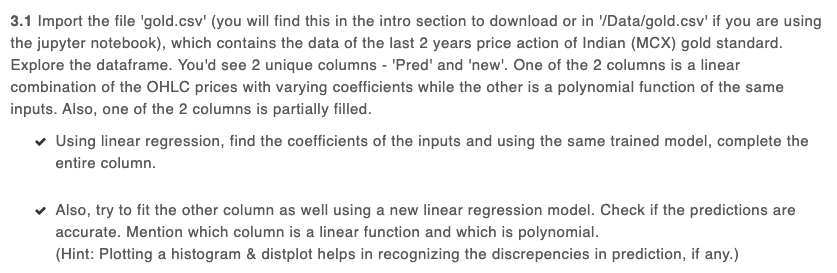

In [1521]:
#Libraries for regression model
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.api as sm


In [1522]:
#importing the file
ds = pd.read_csv('GOLD.csv')
ds

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [1523]:
ds.describe()

,Price,Open,High,Low,Pred,new
count,512.000000,512.000000,512.000000,512.000000,411.000000,512.000000
mean,30364.583984,30368.412109,30491.089844,30243.320312,341.712895,245.161859
std,1284.378623,1296.856656,1307.031684,1271.936410,271.075609,205.788897
min,27812.000000,27805.000000,27887.000000,27620.000000,-146.000000,11.109814
25%,29432.500000,29436.750000,29499.750000,29345.750000,156.500000,101.369172
50%,30427.500000,30399.500000,30545.000000,30286.000000,299.000000,184.537244
75%,31271.750000,31300.000000,31447.500000,31160.750000,475.000000,320.835031
max,33753.000000,34247.000000,34400.000000,33680.000000,2210.000000,1407.321485


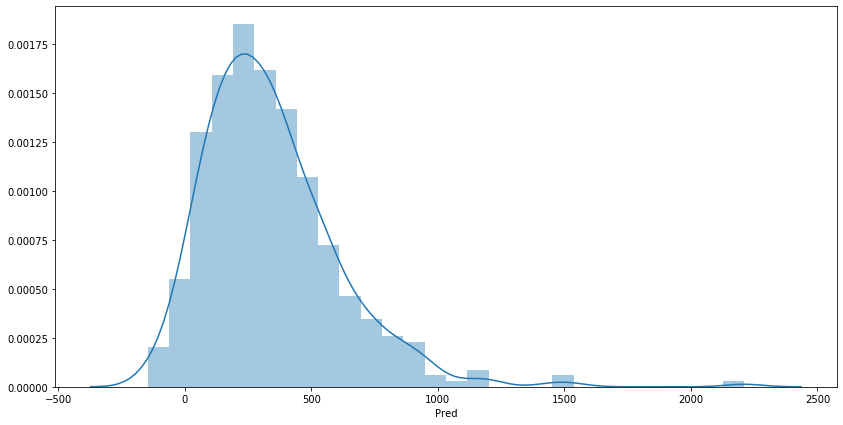

In [1524]:
plt.figure(figsize=(14,7))
sns.distplot(ds['Pred'])

##### PART I

In [1525]:
#Extracting the null values
null_data = ds[ds.isnull().any(axis=1)]
null_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,NaN,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,NaN,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,NaN,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,NaN,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,NaN,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [1526]:
#required attributes for prediction
Xnull = null_data[['Price', 'Open', 'High', 'Low']].values

In [1527]:
#new copy of Dataframe to work upon
dsNew=ds.copy()

In [1528]:
#Having same no. of rows and columns
dsNew

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,NaN,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,NaN,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,NaN,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,NaN,48.365693


In [1529]:
#Removing the null values
dsNew.dropna(inplace=True)

In [1530]:
#Input and Output features
X = dsNew[['Price', 'Open', 'High', 'Low']].values
y = dsNew['Pred'].values

In [1531]:
#spiliting in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [1532]:
#Our model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1533]:
#Our coefficients of each attributes
coeff_df = pd.DataFrame({'Variables':('Price', 'Open', 'High', 'Low'),'Coefficient': regressor.coef_})
coeff_df.set_index("Variables", inplace = True)
coeff_df

,Coefficient
Variables,
Price,2.0
Open,3.0
High,-1.0
Low,-4.0


In [1534]:
#Testing our model
y_pred = regressor.predict(X_test)

In [1535]:
#performs well
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(20)

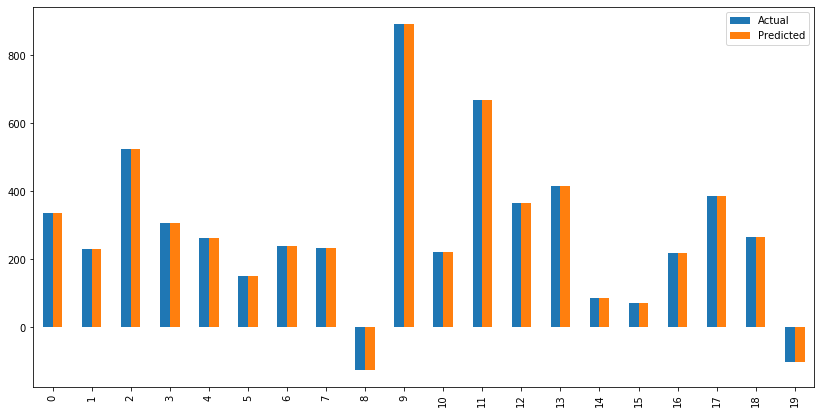

In [1536]:
#Plot to see the difference in actual and predicted value
df1.plot(kind='bar',figsize=(14,7))

Ideal model as the ACTUAL value = PREDICTED value

In [1537]:
# Root Mean Squared Deviation and R^2 value
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Root Mean Square Error :", rmsd)
print("R^2 Value :", r2_value)

Root Mean Square Error : 1.4024456952107402e-11
R^2 Value : 1.0


In [1538]:
#Predicting the nan values of the dataset
predicted = regressor.predict(Xnull)

In [1539]:
#replacing the nan values with the predicted value
null_data['Pred']=predicted

/opt/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [1540]:
#updated dataset
null_data

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
411,"Dec 11, 2018",31812,31850,31850,31618,10.53K,-0.26%,852.0,195.423493
412,"Dec 12, 2018",31626,31749,31749,31582,7.57K,-0.58%,422.0,44.232664
413,"Dec 13, 2018",31414,31550,31600,31337,8.43K,-0.67%,530.0,127.646233
414,"Dec 14, 2018",31437,31440,31514,31384,6.75K,0.07%,144.0,127.219539
415,"Dec 17, 2018",31501,31369,31530,31291,5.97K,0.20%,415.0,372.603976
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


In [1541]:
#replacing the nan values in the original dataset with the predicted values given by the model
ds['Pred'].fillna(null_data['Pred'],inplace =True)

In [1542]:
#our complete dataset
ds

,Date,Price,Open,High,Low,Vol.,Change %,Pred,new
0,"May 04, 2017",28060,28400,28482,28025,0.08K,-1.79%,738.0,117.570740
1,"May 05, 2017",28184,28136,28382,28135,0.06K,0.44%,-146.0,295.430176
2,"May 08, 2017",28119,28145,28255,28097,7.85K,-0.23%,30.0,132.123714
3,"May 09, 2017",27981,28125,28192,27947,10.10K,-0.49%,357.0,101.298064
4,"May 10, 2017",28007,28060,28146,27981,9.28K,0.09%,124.0,112.153318
...,...,...,...,...,...,...,...,...,...
507,"Apr 26, 2019",31868,31851,31934,31705,9.67K,0.08%,535.0,247.177322
508,"Apr 30, 2019",31625,31800,31824,31597,6.44K,-0.76%,438.0,52.201158
509,"May 01, 2019",31563,31604,31657,31503,1.55K,-0.20%,269.0,113.293305
510,"May 02, 2019",31203,31420,31425,31160,0.48K,-1.14%,601.0,48.365693


##### Part II

In [1543]:
#Input and Output features
Xnew = dsNew[['Price', 'Open', 'High', 'Low']].values
Ynew = dsNew['new'].values

In [1544]:
#spiliting in training and testing datasets
X_train, X_test, y_train, y_test = train_test_split(Xnew, Ynew, test_size=0.2, random_state=0)

In [1545]:
#Our model
regressor = LinearRegression()  
regressor.fit(X_train, y_train)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [1546]:
#Our coeficients of each attributes
coeff_df = pd.DataFrame({'Variables':('Price', 'Open', 'High', 'Low'),'Coefficient': regressor.coef_})
coeff_df.set_index("Variables", inplace = True)
coeff_df

,Coefficient
Variables,
Price,1.012169
Open,-1.001122
High,1.005227
Low,-1.016306


In [1547]:
#Testing our model
y_pred = regressor.predict(X_test)

In [1548]:
#performs well
df = pd.DataFrame({'Actual': y_test, 'Predicted': y_pred})
df1=df.head(15)

In [1549]:
df1

,Actual,Predicted
0,120.398673,120.232555
1,393.456838,394.126697
2,86.513259,86.403124
3,38.142880,37.533458
4,86.218724,85.801716
5,118.213047,117.853403
6,170.411965,170.375826
7,475.389093,475.712375
8,200.142913,199.816964
9,53.712785,53.900860


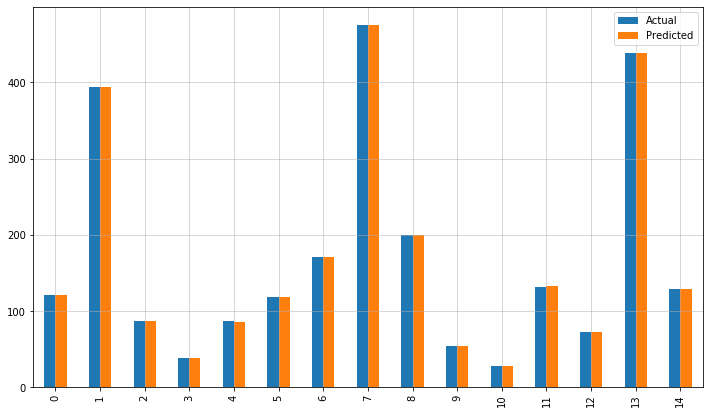

In [1550]:
df1.plot(kind='bar',figsize=(12,7))
plt.grid(which='major', linestyle='-', linewidth='0.5')
plt.grid(which='minor', linestyle=':', linewidth='0.5')
plt.show()

Slight difference can be see between the ACTUAL value and PREDICTED value

In [1551]:
# Root Mean Squared Deviation and R^2 value
rmsd = np.sqrt(mean_squared_error(Y_test, y_pred))      
r2_value = r2_score(Y_test, y_pred)                     

print("Root Mean Square Error \n", rmsd)
print("R^2 Value: \n", r2_value)

Root Mean Square Error 
 318.34205335687403
R^2 Value: 
 -0.6378440085712265


#### 'Pred' column is POLYNOMIAL and 'new' column is LINEAR
R^2 value for 'Pred' column is 1, which depicts the polynomial function while R^2 value for 'new' column is -0.63, which depicts the linear function because R^2 value is high for Polynomial function

## 3.2

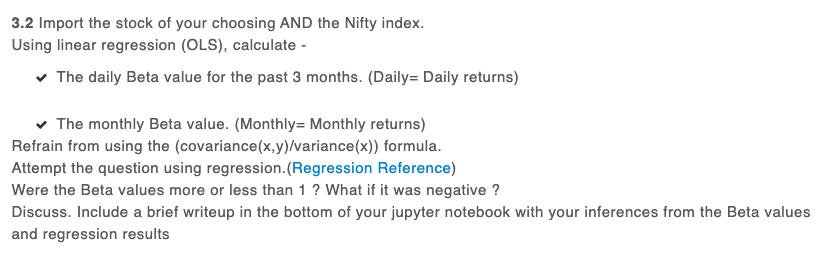

In [1552]:
#Nifty dataset
ds1=pd.read_csv('Nifty50.csv')

In [1553]:
ds1.head()

,Date,Open,High,Low,Close,Shares Traded,Turnover (Rs. Cr)
0,15-May-2017,9433.55,9449.25,9423.10,9445.40,145163953,7790.97
1,16-May-2017,9461.00,9517.20,9456.35,9512.25,171709433,9209.89
2,17-May-2017,9517.60,9532.60,9486.10,9525.75,211856040,10726.23
3,18-May-2017,9453.20,9489.10,9418.10,9429.45,199340647,10782.46
4,19-May-2017,9469.90,9505.75,9390.75,9427.90,259861396,11544.77


In [1554]:
#Apple dataset
ds2=pd.read_csv('AAPL (1).csv')

In [1555]:
ds2.head()

,Date,Close Price,Open Price,High Price,Low Price,Total Traded Quantity
0,"Oct 24, 2019",243.58,244.66,244.75,241.81,17.92M
1,"Oct 23, 2019",243.18,242.10,243.24,241.22,19.93M
2,"Oct 22, 2019",239.96,241.16,242.20,239.62,22.68M
3,"Oct 21, 2019",240.51,237.52,240.99,237.32,22.37M
4,"Oct 18, 2019",236.41,234.59,237.58,234.29,24.38M


##### PART I

In [1556]:
daily_prices = pd.concat([ds1['Close'], ds2['Close Price']], axis=1)
daily_prices.columns = ['NIFTY', 'AAPL']

# check the head of the dataframe
print(daily_prices.head())

# calculate daily returns percentage
daily_returns = daily_prices.pct_change()
daily_returns.dropna(inplace = True)
print(daily_returns.head())

     NIFTY    AAPL
0  9445.40  243.58
1  9512.25  243.18
2  9525.75  239.96
3  9429.45  240.51
4  9427.90  236.41
      NIFTY      AAPL
1  0.007078 -0.001642
2  0.001419 -0.013241
3 -0.010109  0.002292
4 -0.000164 -0.017047
5  0.001098 -0.004780


In [1557]:
# split dependent and independent variable
X = daily_returns['AAPL']
y = daily_returns['NIFTY']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  NIFTY   R-squared:                       0.003
Model:                            OLS   Adj. R-squared:                  0.001
Method:                 Least Squares   F-statistic:                     1.419
Date:                Tue, 07 Jul 2020   Prob (F-statistic):              0.234
Time:                        22:44:52   Log-Likelihood:                 1769.7
No. Observations:                 502   AIC:                            -3535.
Df Residuals:                     500   BIC:                            -3527.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          0.0004      0.000      1.165      0.2

##### PART II

In [1558]:
#Converting to datatime
ds1['Month']=pd.DatetimeIndex(ds1['Date']).month
ds2['Month']=pd.DatetimeIndex(ds2['Date']).month

In [1559]:
#Grouping the data by month
ds1['NIFTY']=ds1.groupby('Month').agg({'Close' : 'mean'})
ds2['AAPL']=ds2.groupby('Month').agg({'Close Price' : 'mean'})

In [1560]:
# split dependent and independent variable
monthly_prices=pd.concat([ds1['NIFTY'],ds2['AAPL']],axis=1)
monthly_prices.columns=['NIFTY','AAPL']

# check the head of the dataframe
print(monthly_prices.head())

# calculate daily returns percentage
monthly_returns = monthly_prices.pct_change()
monthly_returns.dropna(inplace = True)
print(monthly_returns.head())

          NIFTY        AAPL
0           NaN         NaN
1  10790.734444  164.085714
2  10687.328205  169.683421
3  10774.930263  178.895000
4  11039.855000  185.175238
      NIFTY      AAPL
2 -0.009583  0.034115
3  0.008197  0.054287
4  0.024587  0.035106
5 -0.052649  0.017443
6 -0.027122  0.012404


In [1561]:
# split dependent and independent variable
X = monthly_returns['AAPL']
y = monthly_returns['NIFTY']

# Add a constant to the independent value
X1 = sm.add_constant(X)

# make regression model 
model = sm.OLS(y, X1)

# fit model and print results
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  NIFTY   R-squared:                       0.014
Model:                            OLS   Adj. R-squared:                  0.012
Method:                 Least Squares   F-statistic:                     7.300
Date:                Tue, 07 Jul 2020   Prob (F-statistic):            0.00713
Time:                        22:44:52   Log-Likelihood:                 2090.8
No. Observations:                 501   AIC:                            -4178.
Df Residuals:                     499   BIC:                            -4169.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -3.319e-05      0.000     -0.199      0.8

#### ● If the β = +ve 
It means that for every 1 unit increase in the predictor(Independent) variable, the outcome(Dependent) variable will increase by the β coefficient value. 

#### ● If the β = -ve 
It means that for every 1 unit increase in the predictor(Independent) variable, the outcome(Dependent) variable will decrease by the β coefficient value. 

• β value is +ve for Daily return and β value is -ve for Monthly return.

# Thank You!